In [1]:
# Dataset: IMDb Top 1000 Movies
# Objetivo: Identificar padrões, tendências e insights sobre os filmes mais bem avaliados DO IMBD
# 1. INTRODUÇÃO
# ----------------------------------------------------------------------------
"""
CONTEXTO DO DATASET:
Este dataset contém informações sobre os 1000 filmes mais bem avaliados do IMDb,
incluindo dados como nota, metascore, receita, gênero, elenco, diretor e ano 
de lançamento.

OBJETIVO DA ANÁLISE:
- Explorar a distribuição das avaliações dos filmes
- Identificar relações entre variáveis (nota, receita, metascore)
- Descobrir gêneros, diretores e atores mais frequentes
- Analisar tendências ao longo dos anos
- Gerar insights valiosos para entender o que caracteriza filmes de sucesso
"""


'\nCONTEXTO DO DATASET:\nEste dataset contém informações sobre os 1000 filmes mais bem avaliados do IMDb,\nincluindo dados como nota, metascore, receita, gênero, elenco, diretor e ano \nde lançamento.\n\nOBJETIVO DA ANÁLISE:\n- Explorar a distribuição das avaliações dos filmes\n- Identificar relações entre variáveis (nota, receita, metascore)\n- Descobrir gêneros, diretores e atores mais frequentes\n- Analisar tendências ao longo dos anos\n- Gerar insights valiosos para entender o que caracteriza filmes de sucesso\n'

In [2]:
# 2. CONFIGURAÇÃO DO AMBIENTE
# ----------------------------------------------------------------------------

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# Configurações gerais
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("Bibliotecas importadas com sucesso!")
print("Configurações de visualização aplicadas!")


Bibliotecas importadas com sucesso!
Configurações de visualização aplicadas!


In [4]:
# ------------------------------------------------------------
# 3. CARREGAMENTO DOS DADOS 
# ------------------------------------------------------------

import os
import pandas as pd

base_path = '/kaggle/input'
dataset_folder = 'imdbtop1000movies' 
dataset_path = os.path.join(base_path, dataset_folder)

print("Conteúdo de /kaggle/input:")
print(os.listdir(base_path))

print("\nConteúdo da pasta do dataset:")
print(os.listdir(dataset_path))

# Encontrando automaticamente o CSV
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

if len(csv_files) == 0:
    raise FileNotFoundError("Nenhum arquivo CSV encontrado na pasta do dataset.")

csv_path = os.path.join(dataset_path, csv_files[0])
print(f"\nArquivo CSV encontrado: {csv_files[0]}")

# Carregando o dataset
df = pd.read_csv(csv_path)
print("\n Dataset carregado com sucesso!")

# Visualização inicial
print("\n" + "="*80)
print("PRIMEIRAS 5 LINHAS DO DATASET")
print("="*80)
display(df.head())

print("\n" + "="*80)
print("INFORMAÇÕES GERAIS DO DATASET")
print("="*80)
df.info()

print("\n" + "="*80)
print("DIMENSÕES DO DATASET")
print("="*80)
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

Conteúdo de /kaggle/input:
['imdbtop1000movies']

Conteúdo da pasta do dataset:
['imdb_top_1000.csv']

Arquivo CSV encontrado: imdb_top_1000.csv

 Dataset carregado com sucesso!

PRIMEIRAS 5 LINHAS DO DATASET


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"



INFORMAÇÕES GERAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB

DIMEN

In [5]:
# 4. LIMPEZA E PREPARAÇÃO DOS DADOS
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("ANÁLISE DE VALORES NULOS")
print("="*80)

# Verificando valores nulos
valores_nulos = df.isnull().sum()
print(valores_nulos[valores_nulos > 0])

# Estatísticas descritivas antes da limpeza
print("\n" + "="*80)
print("ESTATÍSTICAS DESCRITIVAS (ANTES DA LIMPEZA)")
print("="*80)
print(df.describe())

# --- LIMPEZA DA COLUNA 'Released_Year' ---
# Removendo linhas onde o ano é 'PG' ou outros valores inválidos
print("\n→ Limpando coluna 'Released_Year'...")
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df = df.dropna(subset=['Released_Year'])
df['Released_Year'] = df['Released_Year'].astype(int)
print(f"   Valores convertidos para inteiro. Linhas restantes: {len(df)}")

# --- LIMPEZA DA COLUNA 'Runtime' ---
# Removendo 'min' e convertendo para numérico
print("\n→ Limpando coluna 'Runtime'...")
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
print(f"   Duração convertida para minutos (numérico)")

# --- LIMPEZA DA COLUNA 'Gross' ---
# Removendo vírgulas e convertendo para numérico
print("\n→ Limpando coluna 'Gross'...")
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
print(f"   Receita convertida para numérico")
print(f"   Valores nulos em 'Gross': {df['Gross'].isnull().sum()} (esperado, nem todos os filmes têm dados de receita)")

# --- LIMPEZA DA COLUNA 'Meta_score' ---
print("\n→ Verificando coluna 'Meta_score'...")
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
print(f"   Valores nulos em 'Meta_score': {df['Meta_score'].isnull().sum()}")

# --- TRATAMENTO DE VALORES NULOS FINAIS ---
print("\n→ Tratando valores nulos restantes...")
# Mantemos os valores nulos em 'Gross' e 'Meta_score' pois são dados realmente ausentes
# Não vamos removê-los para não perder informações valiosas

print("\n✓ LIMPEZA CONCLUÍDA")
print(f"Dataset final possui {len(df)} filmes e {df.shape[1]} colunas")

# Estatísticas após limpeza
print("\n" + "="*80)
print("ESTATÍSTICAS DESCRITIVAS (APÓS LIMPEZA)")
print("="*80)
print(df[['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].describe())



ANÁLISE DE VALORES NULOS
Certificate    101
Meta_score     157
Gross          169
dtype: int64

ESTATÍSTICAS DESCRITIVAS (ANTES DA LIMPEZA)
       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06

→ Limpando coluna 'Released_Year'...
   Valores convertidos para inteiro. Linhas restantes: 999

→ Limpando coluna 'Runtime'...
   Duração convertida para minutos (numérico)

→ Limpando coluna 'Gross'...
   Receita convertida para numérico
   Valores nulos em 'Gross': 169 (esperado, nem todos os filmes têm dados de receita)

→ Verificando coluna 'Meta_score'...
   Valores nulos em 'Meta_score': 157

→ Tratando valores nulos restantes...

✓ LIMPEZA C


 INICIANDO ANALISE EXPLORATÓRIA DE DADOS

 --- Analisando distribuição das notas do IMDB... ---


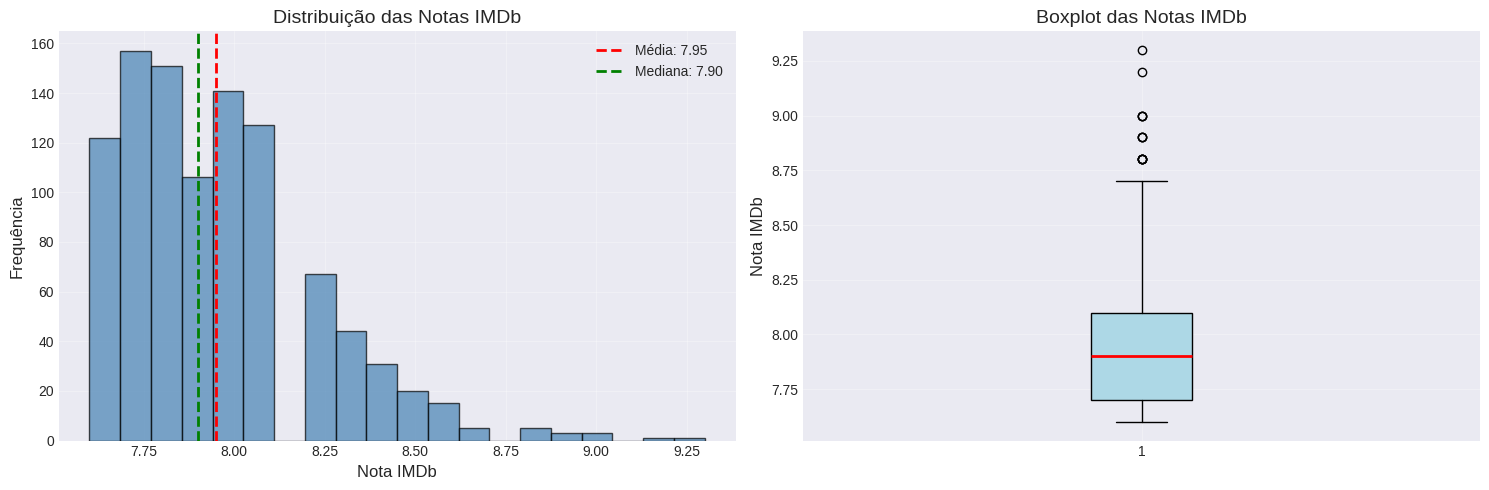

 Nota média: 7.95
 Nota mediana: 7.90
 Desvio padrão: 0.28
 Nota mínima: 7.60
 Nota máxima: 9.30


In [6]:
# 5.1 DISTRIBUIÇÃO DAS NOTAS DO IMDB
print("\n" + "="*80)
print(" INICIANDO ANALISE EXPLORATÓRIA DE DADOS")
print("="*80)

print("\n --- Analisando distribuição das notas do IMDB... ---")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(df['IMDB_Rating'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Nota IMDb')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição das Notas IMDb')

# Média e mediana no gráfico
axes[0].axvline(df['IMDB_Rating'].mean(), color='red', linestyle='--', linewidth=2, label=f"Média: {df['IMDB_Rating'].mean():.2f}")
axes[0].axvline(df['IMDB_Rating'].median(), color='green', linestyle='--', linewidth=2, label=f"Mediana: {df['IMDB_Rating'].median():.2f}")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['IMDB_Rating'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Nota IMDb')
axes[1].set_title('Boxplot das Notas IMDb')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f" Nota média: {df['IMDB_Rating'].mean():.2f}")
print(f" Nota mediana: {df['IMDB_Rating'].median():.2f}")
print(f" Desvio padrão: {df['IMDB_Rating'].std():.2f}")
print(f" Nota mínima: {df['IMDB_Rating'].min():.2f}")
print(f" Nota máxima: {df['IMDB_Rating'].max():.2f}")


→ Analisando relação entre IMDb Rating e Meta Score...


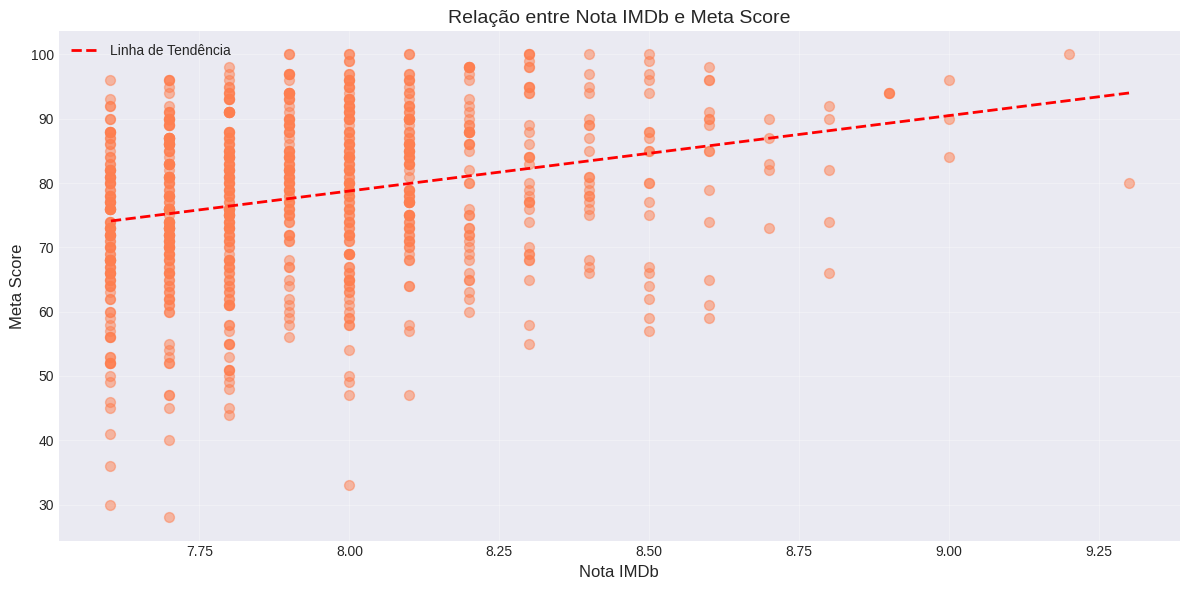

   Correlação entre IMDb Rating e Meta Score: 0.269
   Filmes com Meta Score disponível: 842 de 999


In [7]:
# --- 5.2 RELAÇÃO ENTRE IMDB_RATING E META_SCORE ---
print("\n→ Analisando relação entre IMDb Rating e Meta Score...")

# Filtrando apenas filmes com Meta_score disponível
df_meta = df.dropna(subset=['Meta_score'])

plt.figure(figsize=(12, 6))
plt.scatter(df_meta['IMDB_Rating'], df_meta['Meta_score'], alpha=0.5, s=50, color='coral')
plt.xlabel('Nota IMDb')
plt.ylabel('Meta Score')
plt.title('Relação entre Nota IMDb e Meta Score')
plt.grid(True, alpha=0.3)

# Adicionando linha de tendência
z = np.polyfit(df_meta['IMDB_Rating'], df_meta['Meta_score'], 1)
p = np.poly1d(z)
plt.plot(df_meta['IMDB_Rating'], p(df_meta['IMDB_Rating']), 
         "r--", linewidth=2, label='Linha de Tendência')
plt.legend()
plt.tight_layout()
plt.show()

# Calculando correlação
correlacao = df_meta['IMDB_Rating'].corr(df_meta['Meta_score'])
print(f"   Correlação entre IMDb Rating e Meta Score: {correlacao:.3f}")
print(f"   Filmes com Meta Score disponível: {len(df_meta)} de {len(df)}")



→ Analisando filmes mais votados...


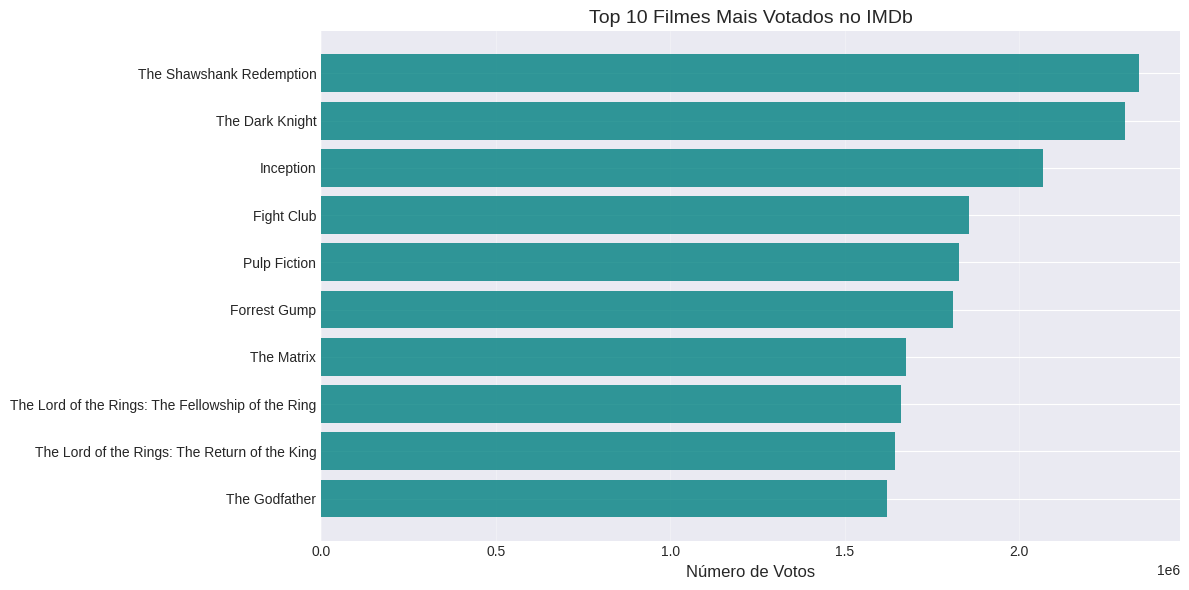


Top 10 Filmes Mais Votados:
                                     Series_Title  No_of_Votes  IMDB_Rating
                         The Shawshank Redemption      2343110          9.3
                                  The Dark Knight      2303232          9.0
                                        Inception      2067042          8.8
                                       Fight Club      1854740          8.8
                                     Pulp Fiction      1826188          8.9
                                     Forrest Gump      1809221          8.8
                                       The Matrix      1676426          8.7
The Lord of the Rings: The Fellowship of the Ring      1661481          8.8
    The Lord of the Rings: The Return of the King      1642758          8.9
                                    The Godfather      1620367          9.2

→ Analisando relação entre receita e avaliação...


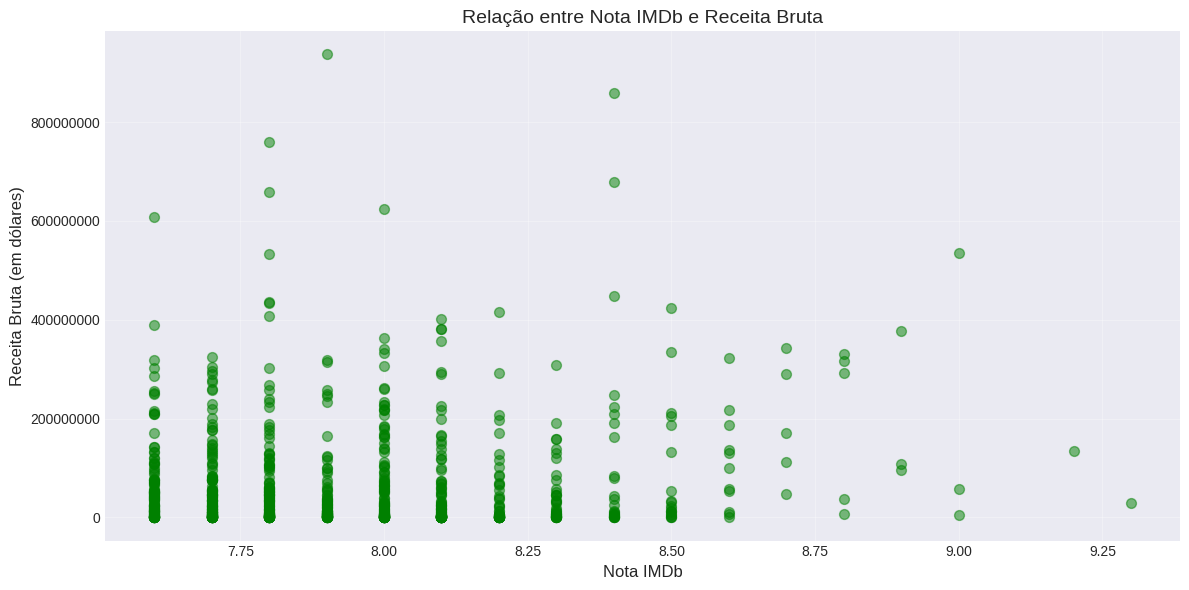

   Correlação entre IMDb Rating e Receita: 0.097
   Filmes com dados de receita: 830 de 999
   Receita média: $67,907,277.16
   Receita máxima: $936,662,225.00

Top 5 Filmes por Receita:
                              Series_Title       Gross  IMDB_Rating
Star Wars: Episode VII - The Force Awakens 936662225.0          7.9
                         Avengers: Endgame 858373000.0          8.4
                                    Avatar 760507625.0          7.8
                    Avengers: Infinity War 678815482.0          8.4
                                   Titanic 659325379.0          7.8

→ Analisando gêneros mais frequentes...


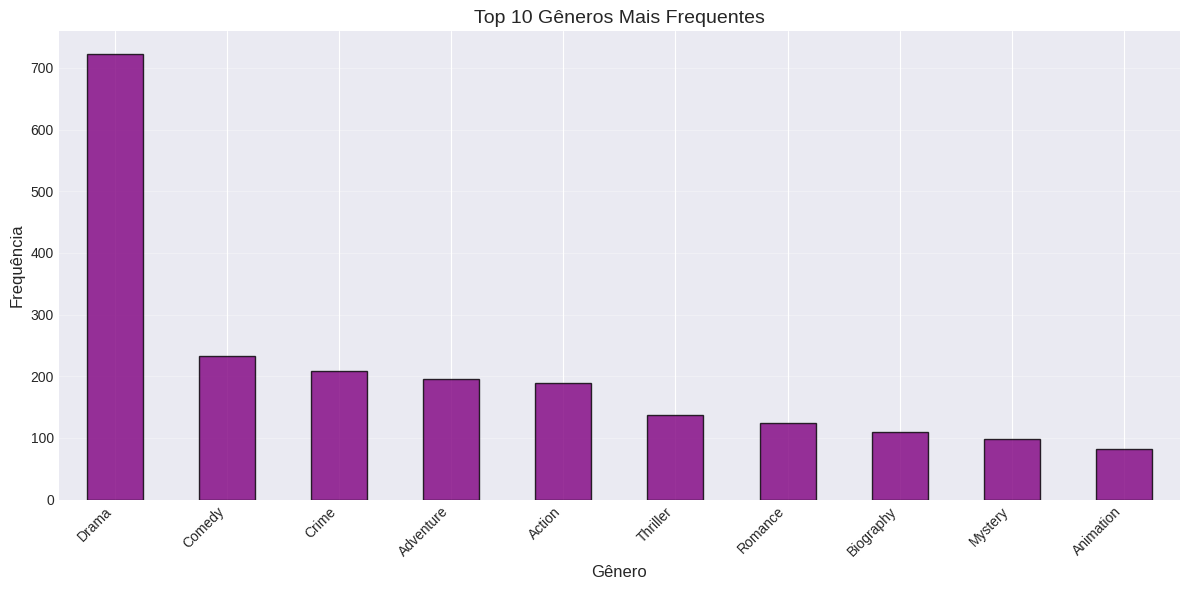


Top 10 Gêneros:
Drama        723
Comedy       233
Crime        209
Adventure    195
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64


In [8]:
# --- 5.3 FILMES MAIS VOTADOS ---
print("\n→ Analisando filmes mais votados...")

top_votados = df.nlargest(10, 'No_of_Votes')[['Series_Title', 'No_of_Votes', 'IMDB_Rating']]

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_votados)), top_votados['No_of_Votes'], color='teal', alpha=0.8)
plt.yticks(range(len(top_votados)), top_votados['Series_Title'])
plt.xlabel('Número de Votos')
plt.title('Top 10 Filmes Mais Votados no IMDb')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Filmes Mais Votados:")
print(top_votados.to_string(index=False))

# --- 5.4 RELAÇÃO ENTRE RECEITA (GROSS) E AVALIAÇÃO ---
print("\n→ Analisando relação entre receita e avaliação...")

# Filtrando apenas filmes com receita disponível
df_gross = df.dropna(subset=['Gross'])

plt.figure(figsize=(12, 6))
plt.scatter(df_gross['IMDB_Rating'], df_gross['Gross'], alpha=0.5, s=50, color='green')
plt.xlabel('Nota IMDb')
plt.ylabel('Receita Bruta (em dólares)')
plt.title('Relação entre Nota IMDb e Receita Bruta')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

correlacao_gross = df_gross['IMDB_Rating'].corr(df_gross['Gross'])
print(f"   Correlação entre IMDb Rating e Receita: {correlacao_gross:.3f}")
print(f"   Filmes com dados de receita: {len(df_gross)} de {len(df)}")
print(f"   Receita média: ${df_gross['Gross'].mean():,.2f}")
print(f"   Receita máxima: ${df_gross['Gross'].max():,.2f}")

# Filmes com maior receita
top_receita = df_gross.nlargest(5, 'Gross')[['Series_Title', 'Gross', 'IMDB_Rating']]
print("\nTop 5 Filmes por Receita:")
print(top_receita.to_string(index=False))

# --- 5.5 GÊNEROS MAIS FREQUENTES ---
print("\n→ Analisando gêneros mais frequentes...")

# Separando gêneros (muitos filmes têm múltiplos gêneros separados por vírgula)
todos_generos = []
for generos in df['Genre'].dropna():
    todos_generos.extend([g.strip() for g in generos.split(',')])

# Contando frequência
generos_count = pd.Series(todos_generos).value_counts().head(10)

plt.figure(figsize=(12, 6))
generos_count.plot(kind='bar', color='purple', alpha=0.8, edgecolor='black')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.title('Top 10 Gêneros Mais Frequentes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Gêneros:")
print(generos_count)


→ Analisando diretores mais recorrentes...


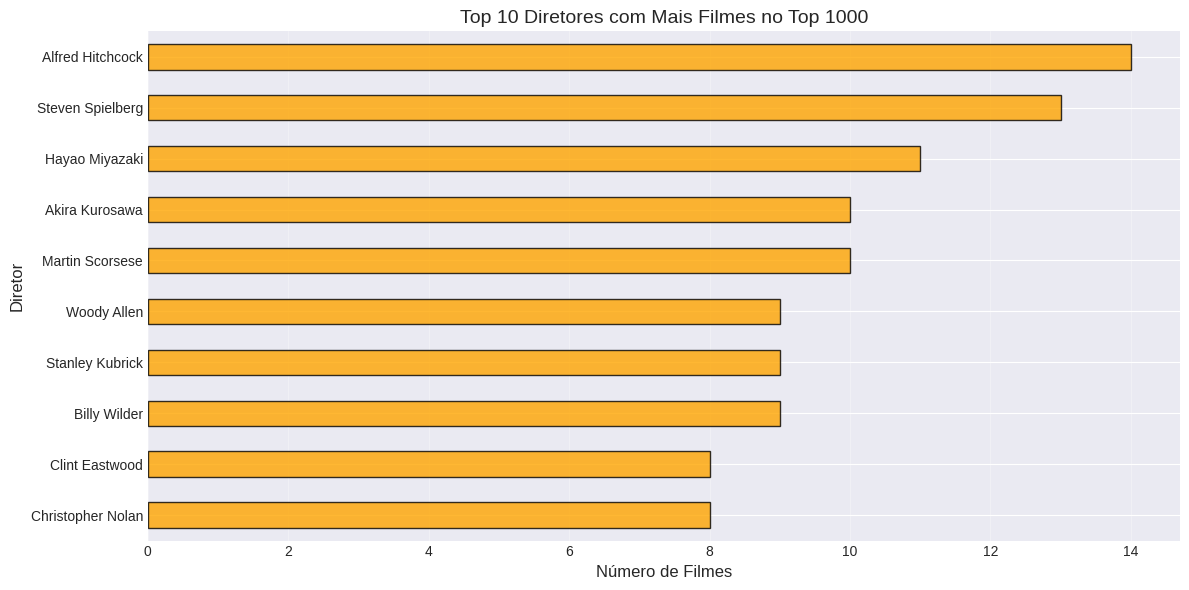


Top 10 Diretores:
Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Woody Allen           9
Stanley Kubrick       9
Billy Wilder          9
Clint Eastwood        8
Christopher Nolan     8
Name: count, dtype: int64

→ Analisando atores mais recorrentes...


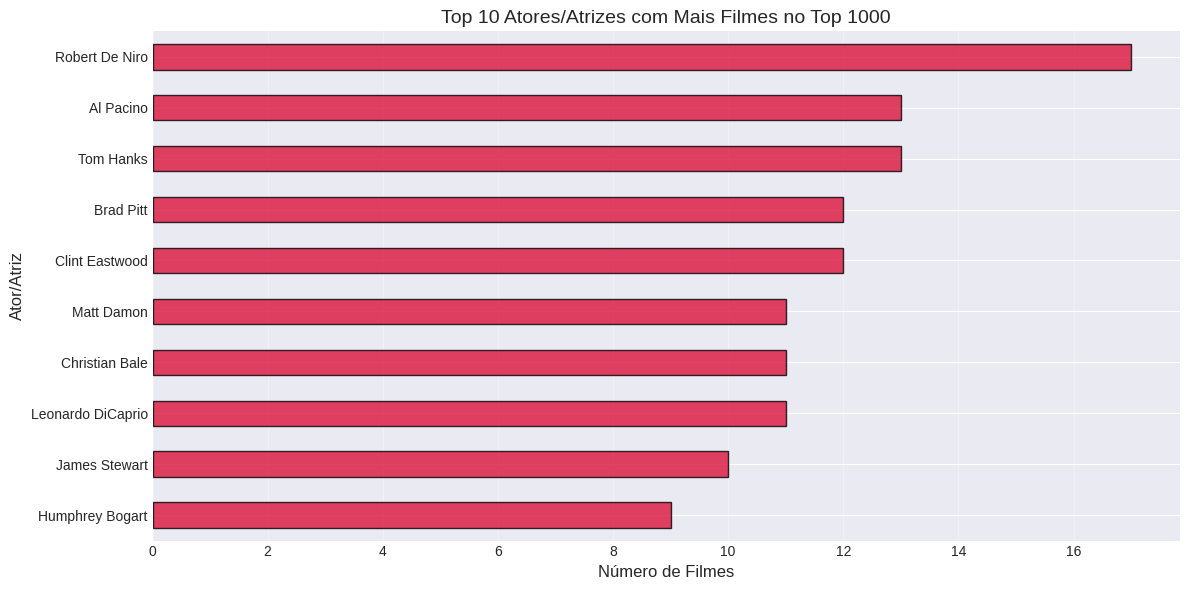


Top 10 Atores/Atrizes:
Robert De Niro       17
Al Pacino            13
Tom Hanks            13
Brad Pitt            12
Clint Eastwood       12
Matt Damon           11
Christian Bale       11
Leonardo DiCaprio    11
James Stewart        10
Humphrey Bogart       9
Name: count, dtype: int64

→ Analisando evolução temporal dos filmes...


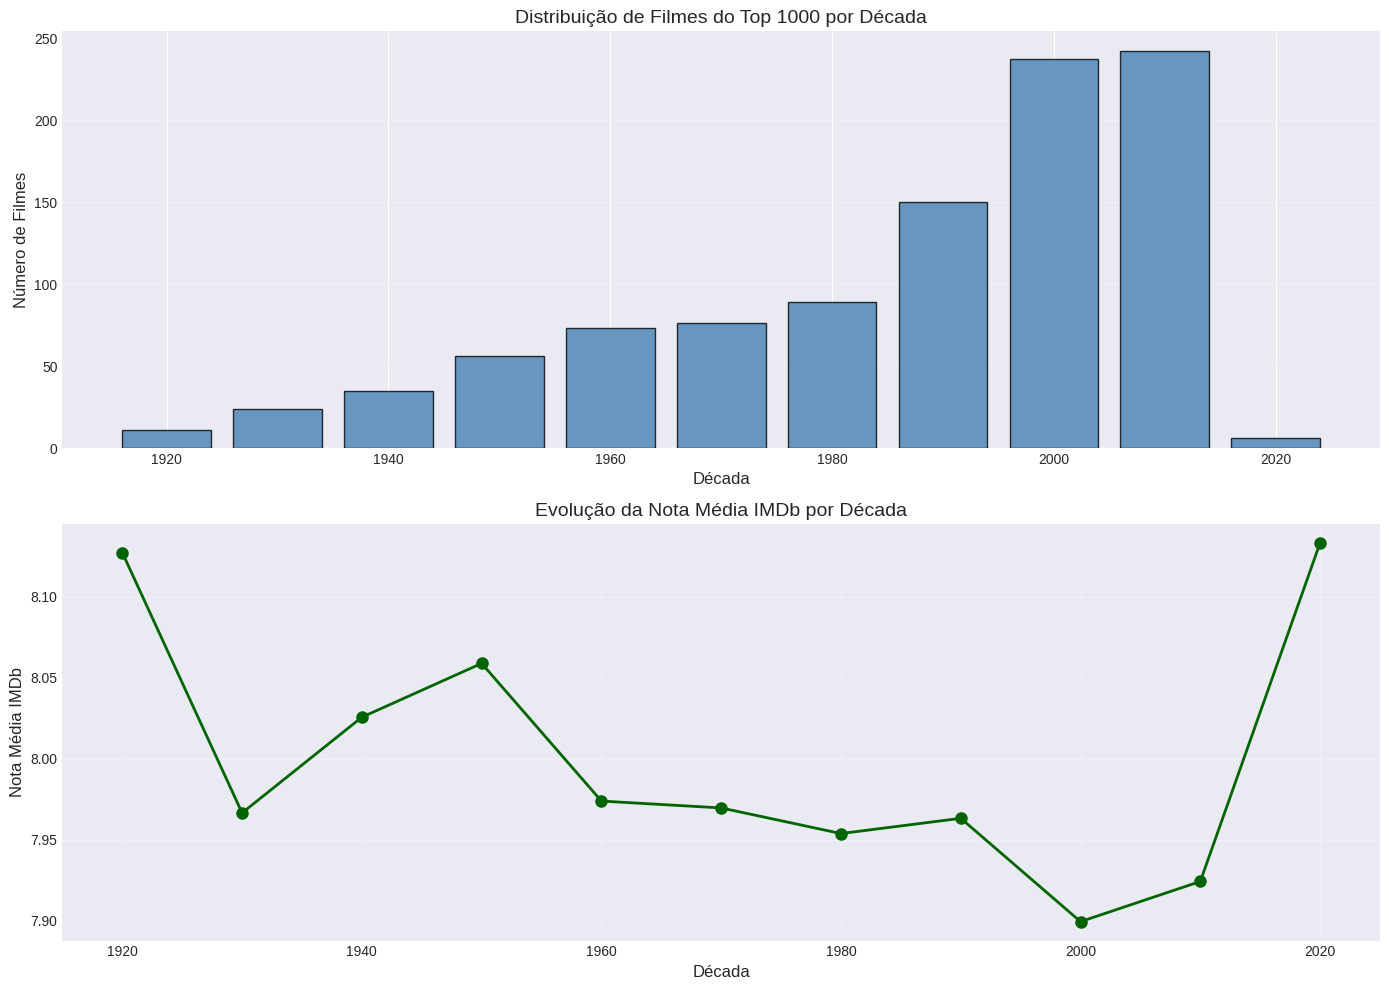


Filmes por Década:
Decada
1920     11
1930     24
1940     35
1950     56
1960     73
1970     76
1980     89
1990    150
2000    237
2010    242
2020      6
dtype: int64

Nota Média por Década:
Decada
1920    8.127273
1930    7.966667
1940    8.025714
1950    8.058929
1960    7.973973
1970    7.969737
1980    7.953933
1990    7.963333
2000    7.899578
2010    7.924380
2020    8.133333
Name: IMDB_Rating, dtype: float64


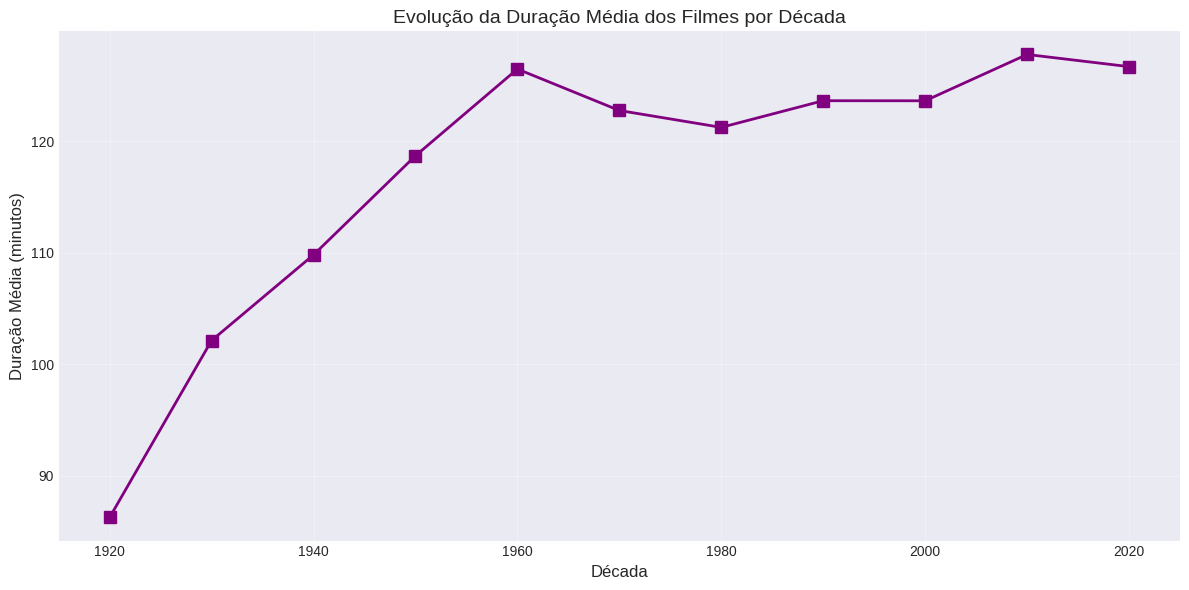


Duração Média por Década:
Decada
1920     86.272727
1930    102.125000
1940    109.800000
1950    118.678571
1960    126.452055
1970    122.736842
1980    121.224719
1990    123.613333
2000    123.607595
2010    127.756198
2020    126.666667
Name: Runtime, dtype: float64


In [9]:
# --- 5.6 DIRETORES E ATORES MAIS RECORRENTES ---
print("\n→ Analisando diretores mais recorrentes...")

# Top diretores
top_diretores = df['Director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_diretores.plot(kind='barh', color='orange', alpha=0.8, edgecolor='black')
plt.xlabel('Número de Filmes')
plt.ylabel('Diretor')
plt.title('Top 10 Diretores com Mais Filmes no Top 1000')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Diretores:")
print(top_diretores)

print("\n→ Analisando atores mais recorrentes...")

# Combinando todos os atores (Star1, Star2, Star3, Star4)
todos_atores = []
for col in ['Star1', 'Star2', 'Star3', 'Star4']:
    todos_atores.extend(df[col].dropna().tolist())

# Top atores
top_atores = pd.Series(todos_atores).value_counts().head(10)

plt.figure(figsize=(12, 6))
top_atores.plot(kind='barh', color='crimson', alpha=0.8, edgecolor='black')
plt.xlabel('Número de Filmes')
plt.ylabel('Ator/Atriz')
plt.title('Top 10 Atores/Atrizes com Mais Filmes no Top 1000')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Atores/Atrizes:")
print(top_atores)

# --- 5.7 EVOLUÇÃO DOS FILMES AO LONGO DOS ANOS ---
print("\n→ Analisando evolução temporal dos filmes...")

# Agrupando por década
df['Decada'] = (df['Released_Year'] // 10) * 10

# Número de filmes por década
filmes_por_decada = df.groupby('Decada').size()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico 1: Número de filmes por década
axes[0].bar(filmes_por_decada.index, filmes_por_decada.values, 
            width=8, color='steelblue', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Década')
axes[0].set_ylabel('Número de Filmes')
axes[0].set_title('Distribuição de Filmes do Top 1000 por Década')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Nota média por década
nota_por_decada = df.groupby('Decada')['IMDB_Rating'].mean()

axes[1].plot(nota_por_decada.index, nota_por_decada.values, 
             marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1].set_xlabel('Década')
axes[1].set_ylabel('Nota Média IMDb')
axes[1].set_title('Evolução da Nota Média IMDb por Década')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFilmes por Década:")
print(filmes_por_decada)
print("\nNota Média por Década:")
print(nota_por_decada)

# Analisando duração ao longo do tempo
duracao_por_decada = df.groupby('Decada')['Runtime'].mean()

plt.figure(figsize=(12, 6))
plt.plot(duracao_por_decada.index, duracao_por_decada.values, 
         marker='s', linewidth=2, markersize=8, color='purple')
plt.xlabel('Década')
plt.ylabel('Duração Média (minutos)')
plt.title('Evolução da Duração Média dos Filmes por Década')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nDuração Média por Década:")
print(duracao_por_decada)


# Insights Analíticos

## 1. Distribuição das Notas

As notas apresentam:

- Média: 7.95  
- Mediana: 7.90  
- Desvio padrão: 0.28  
- Mínima: 7.60  
- Máxima: 9.30  

A baixa dispersão (desvio padrão de 0.28) indica forte concentração das avaliações em uma faixa estreita.  
Como o dataset representa o Top 1000 do IMDb, essa concentração é coerente com um viés de seleção para filmes já bem avaliados.

Pequenas variações decimais tornam-se relevantes dentro desse contexto de baixa variabilidade.

---

## 2. Relação entre IMDb Rating e Meta Score

A correlação entre IMDb Rating e Meta Score é 0.269, com 842 filmes possuindo Meta Score disponível.

Esse valor indica correlação positiva fraca a moderada.  
Existe alinhamento parcial entre avaliação do público e da crítica especializada, porém as métricas não são equivalentes.

A associação é estatisticamente perceptível, mas não forte.

---

## 3. Relação entre Receita e Avaliação

A correlação entre Receita (Gross) e IMDb Rating é 0.097, com 830 filmes contendo dados de receita.

Esse valor indica correlação extremamente fraca, sugerindo ausência de relação linear significativa entre sucesso comercial e avaliação média.

Dados adicionais observados:
- Receita média: $67.907.277,16  
- Receita máxima: $936.662.225,00  

Portanto, desempenho financeiro não é um preditor relevante da nota IMDb.

---

## 4. Gêneros Mais Frequentes

A contagem por gênero mostra:

- Drama: 723
- Comedy: 233
- Crime: 209
- Adventure: 195
- Action: 189

Drama é amplamente dominante no ranking.

Isso indica forte presença de narrativas dramáticas entre os filmes do Top 1000.

---

## 5. Evolução Temporal

As décadas com maior número de filmes são:

- 2000: 237 filmes
- 2010: 242 filmes

A nota média por década varia pouco, por exemplo:

- 2000: 7.899578
- 2010: 7.924380
- 2020: 8.133333

Isso indica estabilidade da avaliação média ao longo do tempo, mesmo com maior concentração de filmes nas décadas recentes.

---

## 6. Duração Média ao Longo do Tempo

A duração média dos filmes aumentou ao longo das décadas:

- 1920: aproximadamente 86.27 minutos
- 2010: aproximadamente 127.76 minutos

Isso indica tendência histórica de aumento na duração média das produções ao longo do tempo.

# Conclusão

## Síntese dos Resultados

A análise do IMDB Top 1000 evidencia que:

1. O conjunto é altamente concentrado em filmes bem avaliados, com média 7.95 e baixa variabilidade (desvio padrão 0.28).

2. Existe correlação positiva fraca a moderada (0.269) entre avaliação do público e da crítica, indicando alinhamento parcial entre as métricas.

3. A relação entre receita e nota é extremamente fraca (0.097), demonstrando que sucesso comercial e avaliação não seguem a mesma dinâmica.

4. O gênero Drama domina o ranking com 723 ocorrências, superando amplamente os demais gêneros.

5. As décadas de 2000 e 2010 concentram o maior número de filmes, porém a nota média permanece relativamente estável ao longo do tempo.

6. A duração média dos filmes apresenta tendência de crescimento histórico.

## Interpretação Geral

Os resultados indicam que popularidade, reconhecimento crítico e desempenho financeiro representam dimensões relacionadas ao sucesso de um filme, porém estatisticamente distintas.

A estabilidade das notas ao longo das décadas, combinada com a baixa correlação entre receita e avaliação, sugere que o ranking prioriza qualidade percebida de forma relativamente consistente ao longo do tempo.